<a href="https://colab.research.google.com/github/rodr1ggoql17/Sistema-de-base-de-datos/blob/main/desafio_final_terminado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio final Sistemas de Bases de Datos
# Integrantes 

1.   Oscar Martínez
2.   Rodrigo Reyes


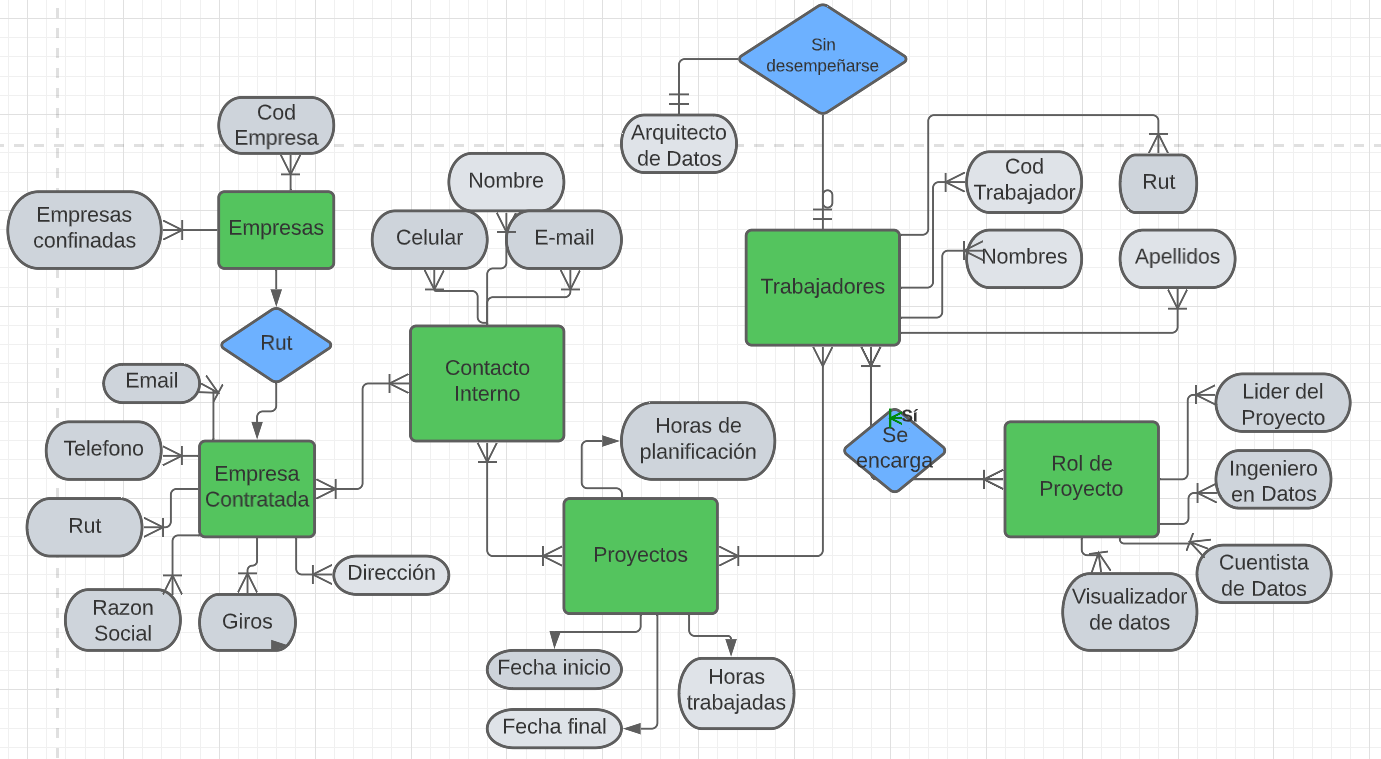

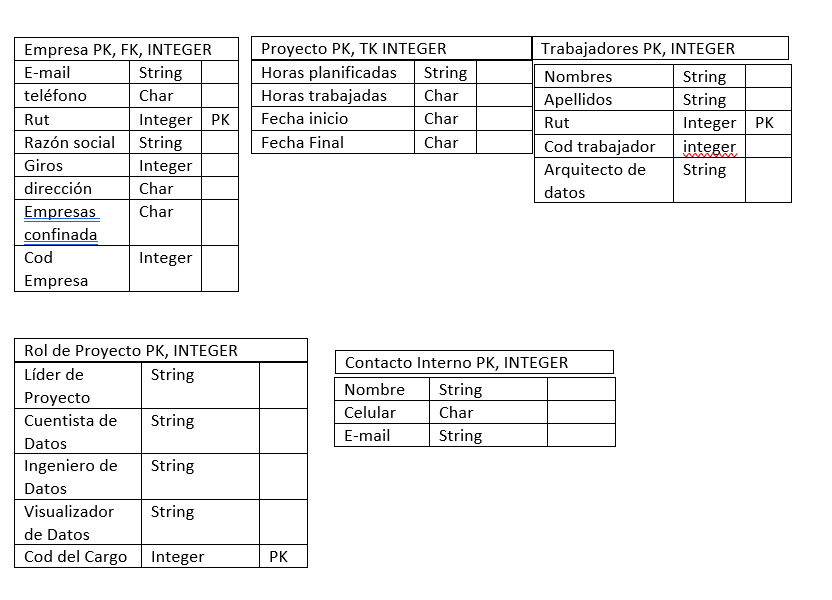

In [ ]:
import sqlite3
from sqlite3 import Error

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
ruta = 'content/drive/MyDrive/Sistema de base de datos'

In [ ]:
class BaseDatos:
  def __init__(self,dir = ruta, bd = 'bd.sqlite3'):
    self.bd = bd
    self.base = dir + bd
    self.conexionSQL()

  def conexionSQL(self):
    try:
      self.conexion = sqlite3.connect(self.bd)
      self.cursor = self.conexion.cursor()
    except Error:
      print(Error)

  def crearBD(self):
      self.cursor.execute("""CREATE TABLE IF NOT EXISTS empresas(
                        dni VARCHAR(9) UNIQUE,
                        rut VARCHAR(20),
                        razon_social VARCHAR(100),
                        giro VARCHAR(100),
                        direccion VARCHAR(100),
                        email VARCHAR(100),
                        telefono VARCHAR(15),
                        contacto_interno VARCHAR(100))""")
      
      self.cursor.execute("""CREATE TABLE IF NOT EXISTS proyectos(
                        id INTEGER,
                        fecha_inicio VARCHAR(100),
                        fecha_fin VARCHAR(100),
                        fecha_estimada VARCHAR(100),
                        rol_proyecto VARCHAR(100))""")
      
      self.cursor.execute("""CREATE TABLE IF NOT EXISTS trabajadores(
                        rut VARCHAR(20),
                        nombre VARCHAR(100),
                        apellido VARCHAR(100),
                        cod_trabajador INTEGER,
                        rol_proyecto VARCHAR(100))""")
      self.conexion.commit()

  def agregar_empresa(self, dni,rut,razon_social,giro,direccion,email,telefono, contacto_interno):
    self.cursor.execute(f"""INSERT INTO empresas (dni,rut,razon_social,giro,direccion,email,telefono, contacto_interno) 
    VALUES('{dni}','{rut}','{razon_social}','{giro}','{direccion}','{email}','{telefono}','{contacto_interno}')""")
    self.conexion.commit()

  def eliminar_empresa(self, dni,rut,razon_social,giro,direccion,email,telefono, contacto_interno):
    self.cursor.execute(f"DELETE FROM empresas WHERE (dni,rut,razon_social,giro,direccion,email,telefono, contacto_interno)= '{dni}','{rut}','{razon_social}','{giro}','{direccion}','{email}','{telefono}','{contacto_interno}'")
    self.conexion.commit()

  def actualizar_empresa(self, dni,rut,razon_social,giro,direccion,email,telefono, contacto_interno):
    query = "UPDATE empresas SET %s=%s WHERE (dni,rut,razon_social,giro,direccion,email,telefono, contacto_interno) = 's'" % (dni,rut,razon_social,giro,direccion,email,telefono, contacto_interno)
    print(query)
    self.cursor.execute(query)
    self.conexion.commit()
    self.cursor.execute("SELECT * FROM empresas WHERE empresa=?",( dni,rut,razon_social,giro,direccion,email,telefono, contacto_interno))
    lista = self.cursor.fetchall
    return lista
      
  def ver_empresa(self):
    self.cursor.execute("SELECT * FROM empresas")
    lista = self.cursor.fetchall()
    return lista

  def agregar_proyecto(self,id,fecha_inicio,fecha_fin, fecha_estimada,rol_proyecto):
    self.cursor.execute(f"""INSERT INTO proyectos (id,fecha_inicio,fecha_fin,fecha_estimada,rol_proyecto) 
    VALUES('{id}','{fecha_inicio}','{fecha_fin}','{fecha_estimada}','{rol_proyecto}')""")
    self.conexion.commit()
      
  def eliminar_proyecto(self,id,fecha_inicio,fecha_fin, fecha_estimada,rol_proyecto):
    self.cursor.execute(f"DELETE FROM proyectos WHERE (id,fecha_inicio,fecha_fin,fecha_estimada,rol_proyecto)='{id}','{fecha_inicio}','{fecha_fin}','{fecha_estimada}','{rol_proyecto}'")
    self.conexion.commit()

  def actualizar_proyecto(self,id,fecha_inicio,fecha_fin, fecha_estimada,rol_proyecto):
    query = "UPDATE empresas SET %s=%s WHERE (id,fecha_inicio,fecha_fin,fecha_estimada,rol_proyecto) = 's'" % (id,fecha_inicio,fecha_fin,fecha_estimada,rol_proyecto) 
    print(query)
    self.cursor.execute(query)
    self.conexion.commit()
    self.cursor.execute("DELETE FROM proyectos WHERE proyecto=?",(id,fecha_inicio,fecha_fin,fecha_estimada,rol_proyecto))
    lista = self.cursor.fetchall()
    return lista

  def ver_proyecto(self):
    self.cursor.execute("SELECT * FROM proyectos")
    lista = self.cursor.fetchall()
    return lista

  def agregar_trabajador(self, id,nombre,apellido,cod_trabajador,rol_proyecto):
    self.cursor.execute(f"""INSERT INTO trabajadores (id,nombre,apellido,cod_trabajador,rol_proyecto)
    VALUES('{id}','{nombre}','{apellido}','{cod_trabajador}','{rol_proyecto}'')""")
    self.conexion.commit()

  def eliminar_trabajador(self,id,nombre,apellido,cod_trabajador,rol_proyecto):
    self.cursor.execute("DELETE FROM trabajadores WHERE trabajador=?",('{id}','{nombre}','{apellido}','{cod_trabajador}','{rol_proyecto}'))
    self.conexion.commit()  
    
  def actualizar_trabajador(self,id,nombre,apellido,cod_trabajador,rol_proyecto):
    query = "UPDATE empresas SET %s=%s WHERE empresa = 's'" % (id,nombre,apellido,cod_trabajador,rol_proyecto)
    print(query)
    self.cursor.execute(query)
    self.conexion.commit()
    self.cursor.execute("DELETE FROM trabajadores WHERE trabajador=?",(id,nombre,apellido,cod_trabajador,rol_proyecto))
    lista = self.cursor.fetchall()
    return lista

  def ver_trabajador(self):
    self.cursor.execute("SELECT * FROM trabajadores")
    lista = self.cursor.fetchall()
    return lista

In [ ]:
my_db =  BaseDatos(bd = 'ge2022.sqlite3')
print(my_db)

In [ ]:
my_db.__init__()

In [ ]:
my_db.crearBD()

In [ ]:
while True:
  print(' 1. agregar empresa')
  print(' 2. eliminar empresa')
  print(' 3. actualizar empresa')
  print(' 4. ver empresa')
  print(' 5. agregar proyecto')
  print(' 6. eliminar proyecto')
  print(' 7. actualizar proyecto')
  print(' 8. ver proyecto')
  print(' 9. agregar trabajador')
  print('10. eliminar trabajador')
  print('11. actualizar trabajador')
  print('12. ver trabajador')
  res = int(input('Ingrese respuesta:'))
  if res == 1:
    dni = input('ingrese dni: ')
    rut = input('Ingrese rut: ')
    razon_social = input('ingrese razon social:')
    giro = input('ingrese giro: ')
    direccion = input('ingrese direccion: ')
    email = input('ingrese email: ')
    telefono = input('ingrese telefono')
    contacto_interno = input('ingrese contacto interno:')
    my_db.agregar_empresa(dni,rut,razon_social,giro,direccion,email,telefono,contacto_interno)
  
  if res==2:
    dni = input('ingrese dni: ')
    rut = input('Ingrese rut: ')
    razon_social = input('ingrese razon social:')
    giro = input('ingrese giro: ')
    direccion = input('ingrese direccion: ')
    email = input('ingrese email: ')
    telefono = input('ingrese telefono')
    contacto_interno = input('ingrese contacto interno:')
    my_db.eliminar_empresa(dni,rut,razon_social,giro,direccion,email,telefono,contacto_interno)

  if res==3:
    dni = input('ingrese dni: ')
    rut = input('Ingrese rut: ')
    razon_social = input('ingrese razon social:')
    giro = input('ingrese giro: ')
    direccion = input('ingrese direccion: ')
    email = input('ingrese email: ')
    telefono = input('ingrese telefono')
    contacto_interno = input('ingrese contacto interno:')
    my_db.actualizar_empresa(dni,rut,razon_social,giro,direccion,email,telefono,contacto_interno)

  if res==4:
    my_db.ver_empresa()

  if res == 5:
    id = int(input('ingrese id: '))
    fecha_inicio = input('ingrese fecha de inicio: ')
    fecha_fin = input('ingrese fecha de termino: ')
    fecha_estimada = input('ingrese fecha estimada: ')
    rol_proyecto = input('ingrese rol de proyecto: ')
    my_db.agregar_proyecto(id,fecha_inicio,fecha_fin,fecha_estimada,rol_proyecto)

  if res==6:
    id = int(input('ingrese id: '))
    fecha_inicio = input('ingrese fecha de inicio: ')
    fecha_fin = input('ingrese fecha de termino: ')
    fecha_estimada = input('ingrese fecha estimada: ')
    rol_proyecto = input('ingrese rol de proyecto: ')
    my_db.eliminar_proyecto(id,fecha_inicio,fecha_fin,fecha_estimada,rol_proyecto)
  
  if res==7:
    id = int(input('ingrese id: '))
    fecha_inicio = input('ingrese fecha de inicio: ')
    fecha_fin = input('ingrese fecha de termino: ')
    fecha_estimada = input('ingrese fecha estimada: ')
    rol_proyecto = input('ingrese rol de proyecto: ')
    my_db.actualizar_proyecto(id,fecha_inicio,fecha_fin,fecha_estimada,rol_proyecto)

  if res==8:
    my_db.ver_proyecto()

  if res == 9:
    rut = input('ngrese rut: ')
    nombre = input('ingrese su nombre: ')
    apellido = input('ingrese su apellido: ')
    cod_trabajador = int(input('ingrese codigo trabajador: '))
    rol_proyecto = input('ingrese rol de proyecto: ')
    my_db.agregar_trabajador(rut,nombre,apellido,cod_trabajador,rol_proyecto)

  if res==10:
    rut = input('ngrese rut: ')
    nombre = input('ingrese su nombre: ')
    apellido = input('ingrese su apellido: ')
    cod_trabajador = int(input('ingrese codigo trabajador: '))
    rol_proyecto = input('ingrese rol de proyecto: ')
    my_db.eliminar_trabajador(rut,nombre,apellido,cod_trabajador,rol_proyecto)
  
  if res==11:
    rut = input('ngrese rut: ')
    nombre = input('ingrese su nombre: ')
    apellido = input('ingrese su apellido: ')
    cod_trabajador = int(input('ingrese codigo trabajador: '))
    rol_proyecto = input('ingrese rol de proyecto: ')
    my_db.actualizar_trabajador(rut,nombre,apellido,cod_trabajador,rol_proyecto)
  
  if res==12:
     my_db.ver_trabajador()